# Python 实现逻辑回归

## 要求：

* 完成逻辑回归各功能模块的定义：模型函数、梯度上升、训练、预测等等
* 按需定义功能函数
* 在个样本上完成模型的训练和预测

## NOTE

* 不限制使用任何第三方的科学计算工具，如$\color{red}{NumPy}$，$\color{red}{Math}$，等等
* 可以使用绘图工具$\color{red}{matplotlib}$直观的展示模型效果
* Sklearn源码可以为大家提供一定的参考和帮助
    * https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

### 指定训练数据路径

In [ ]:
from numpy import *
import matplotlib.pyplot as plt

filename = '../resource/dataset.txt'

### 读取数据文件，生成特征列表和标签列表

In [ ]:
def loadDataSet(filename):
    dataMat = []
    labelMat = []
    data = open(filename)
    for line in data.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

### sigmoid函数定义

In [ ]:
# Sigmoid func
def sigmoid(x):
    return 1 / (1 + exp(-x))

### 梯度上升函数定义，输入为特征和标签列表，输出模型参数

In [14]:
# 梯度上升求最优参数
def gradAscent(dataMat, labelMat):
    # 将读取的数据转换为矩阵
    dataMatrix = mat(dataMat) 
    # 将读取的数据标签转换为矩阵
    classLabels = mat(labelMat).transpose() 

    m, n = shape(dataMatrix)
    # 学习率，该值越大梯度上升幅度越大
    alpha = 0.01 
    maxCycles = 500 # 迭代的次数
    weights = ones((n, 1)) # 参数初始化

    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (classLabels - h)
        # 迭代更新权重
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

### 绘图函数

In [15]:
def plotBestFit(weights, dataMat, labelMat):
    dataArr = array(dataMat)
    n = shape(dataArr)[0]

    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker = 's')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')

    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]

    ax.plot(x, y)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

### 定义主函数, 实现 生成训练数据->模型训练->可视化分类效果 的流程

In [16]:
def main():
    dataMat, labelMat = loadDataSet(filename)
    weights = gradAscent(dataMat, labelMat).getA()
    plotBestFit(weights, dataMat, labelMat)

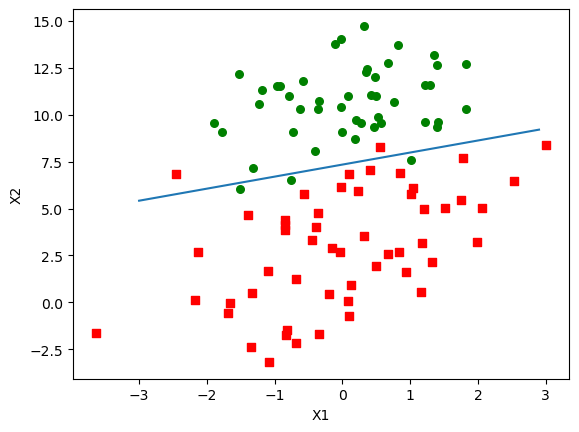

In [17]:
main()

# The work

In [44]:
from numpy import *
import matplotlib.pyplot as plt
import seaborn as sns

filename = '../resource/dataset.txt'

In [76]:
def loadDataSet(filename):   # 读取数据（两个特征）
    """
        按行遍历数据
        构造特征列表->  [[1, x11, x12], [1, x21, x22],...[1, xn1, xn2]] 
        构造标签列表-> [0, 1, 1, 0, 1...1]
        返回特征列表和标签列表
    """
    with open(filename,"r") as f:
        data = f.readlines()
        data = [d.strip("\n").split("\t") for d in data]
        dataMat = [[1,float(d[0]),float(d[1])] for d in data]
        labelMat = [[float(d[2])] for d in data] # mat后的shape为(m,1)
    
    return dataMat,labelMat

In [69]:
# sigmoid func
def sigmoid(x):
    return 1.0 / (1.0 + exp(-x))

In [70]:
# 梯度上升求最优参数
def gradAscent(dataMat, labelMat, alpha, iteration): 
    loss = []
    dataMatrix = mat(dataMat) # 将读取的数据转换为矩阵(m,n)
    classLabels = mat(labelMat) # (m,1)
    m, n = shape(dataMatrix) # 样本数，特征数+1
    # 定义学习率和迭代次数
    alpha = alpha
    iteration = iteration
    # 初始化模型参数，注意参数的shape
    weights = ones((n,1)) # 参数初始化((m,n)x(n,1))
    # 模型训练
    
    for k in range(iteration):
        # 预测
        h_ = sigmoid(dataMatrix * weights) # (m,n)x(n,1)=(m,1)
        h = mat([float(hh) for hh in h_]).T

        # 梯度上升
        weights = weights + alpha * dataMatrix.T * (classLabels - h) # (n,1)+（n,m）x(m,1)=(n,1)

        loss_ = sum(sqrt(multiply(classLabels-h,classLabels-h))) / m
        loss.append(loss_)
    # 返回参数
#         print(f"iter {k+1}, the loss is {loss}")

    return weights, loss, iteration, alpha

In [71]:
# 绘图函数

In [72]:
def plotBestFit(weights, iteration, alpha, dataMat, labelMat): 
    dataArr = array(dataMat) # (m,n)
    n = shape(dataArr)[0] # 样本个数
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i][0])== 1: # 样本类别为1的
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    area = pi * (10 * 0.5)**2
    # 绘制第一类样本点
    ax.scatter(xcord1, ycord1, s=area, c="red", alpha=0.6)
    # 绘制第二类样本点，用不同的颜色和形状区分
    ax.scatter(xcord2, ycord2, s=area, c="b", alpha=0.6, marker='v')
    x = arange(-3.0, 3.0, 0.1).tolist()
    print(arange(-3.0, 3.0, 0.1).shape)
    y = ((-weights[0] - weights[1] * x) / weights[2]).tolist() # (x2 = -(w1x+b)/w2)
    ax.plot(x, y[0])
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(f"iteration={iteration} alpha={alpha}")
    plt.show()

In [73]:
### 定义主函数, 实现 生成训练数据->模型训练->可视化分类效果 的流程

In [74]:
def main():
    dataMat, labelMat = loadDataSet(filename)
    weights1, loss1, iteration1, alpha1 = gradAscent(dataMat, labelMat, alpha=0.02, iteration=1000)
    weights2, loss2, iteration2, alpha2 = gradAscent(dataMat, labelMat, alpha=0.01, iteration=1000)
    weights3, loss3, iteration3, alpha3 = gradAscent(dataMat, labelMat, alpha=0.001, iteration=1000)
    weights4, loss4, iteration4, alpha4 = gradAscent(dataMat, labelMat, alpha=0.0001, iteration=1000)

    # 损失函数图
    fig2 = plt.figure(figsize=(5,5))
    ax = fig2.add_subplot(111)
    ax.plot(range(iteration1), loss1, c="aqua", label=f"alpha={alpha1}", alpha=0.7)
    ax.plot(range(iteration2), loss2, c="r", label=f"alpha={alpha2}", alpha=0.5)
    ax.plot(range(iteration3), loss3, c="b", label=f"alpha={alpha3}")
    ax.plot(range(iteration4), loss4, c="g", label=f"alpha={alpha4}")
    ax.legend()
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    # 分类结果图
    plotBestFit(weights1, iteration1, alpha1, dataMat, labelMat)
    plotBestFit(weights2, iteration2, alpha2, dataMat, labelMat)
    plotBestFit(weights3, iteration3, alpha3, dataMat, labelMat)
    plotBestFit(weights4, iteration4, alpha4, dataMat, labelMat)

(60,)


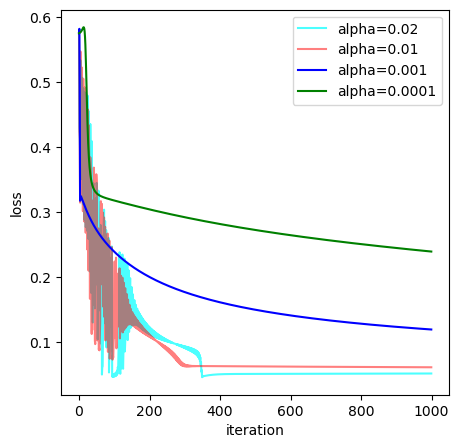

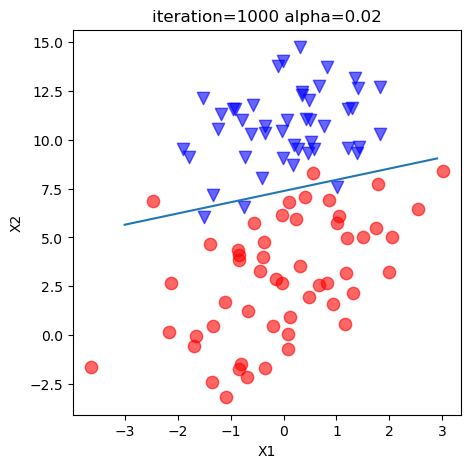

(60,)


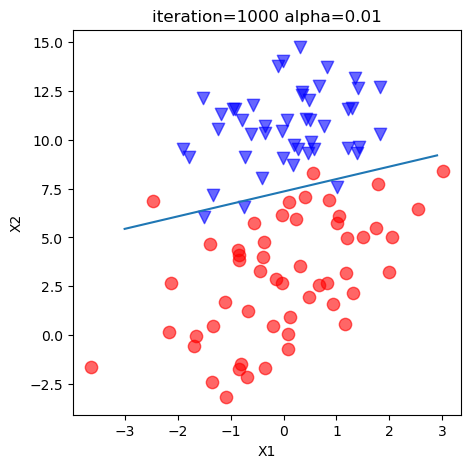

(60,)


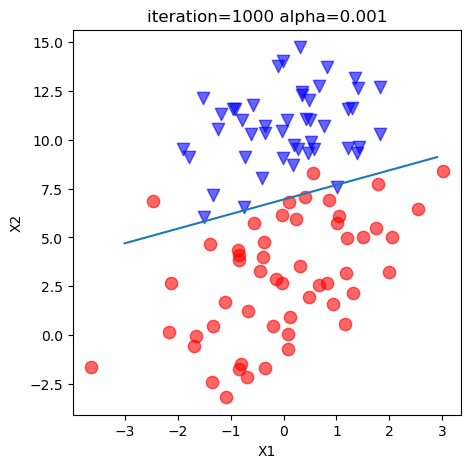

(60,)


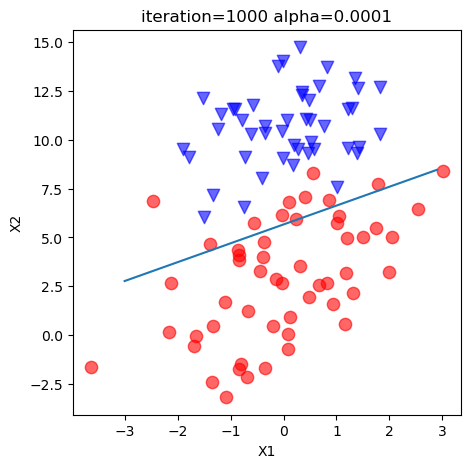

In [77]:
main()